In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('preprocessed_data3.csv')
data = data.dropna()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [4]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['dist_from_home'],y=df['purchase_price_ratio'], hue=df['fraud'])

In [8]:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [6]:
knn =KNeighborsClassifier()
knn.fit(X_train_vectorized, y_train)

In [9]:
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_vectorized, y_train)

In [ ]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [8]:
y_pred = knns.predict(X_test_vectorized)


AttributeError: 'NoneType' object has no attribute 'split'

In [7]:

accuracy = knn.score(X_test_vectorized, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

AttributeError: 'NoneType' object has no attribute 'split'

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [18]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.514807310975084


In [20]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.51      0.99      0.67     23292
     suicide       0.82      0.03      0.06     23104

    accuracy                           0.51     46396
   macro avg       0.66      0.51      0.37     46396
weighted avg       0.66      0.51      0.37     46396



In [21]:
from sklearn.metrics import plot_roc_curve

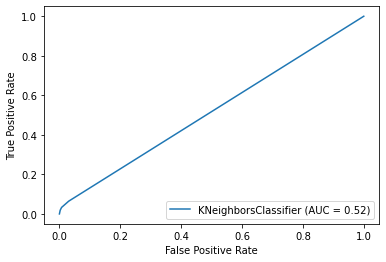

In [22]:
plot_roc_curve(knn, X_test_vectorized, y_test)

In [21]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

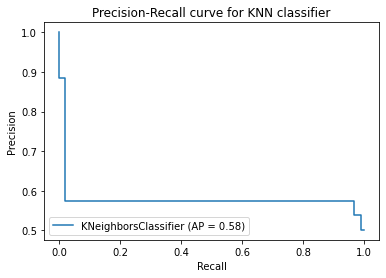

In [22]:
# Plot the precision-recall curve
plot_precision_recall_curve(knn, X_test_vectorized, y_test)

# Visualize the plot
plt.title('Precision-Recall curve for KNN classifier')
plt.show()


In [105]:
sample="hello"
print(knn.predict(vectorizer.transform([sample]))[0])

0


c:\Users\raish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


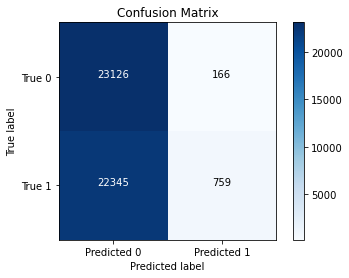

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers to the squares
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()